In [1]:
import os
import glob
import cv2

def end_with_any(string,ends):
    for end in ends:
        if string.endswith(end):
            return True
    return False 

def includes_all(string,includes):
    for include in includes:
        if include not in string:
            return False
    return True

def load_images(dir,include):
    
    files = glob.glob(dir+'/*/*')

    files = [f for f in files if end_with_any(f,include)]
    files.sort()
    images = []
    for f in files:
        img = cv2.imread(f)
        
        images.append((f,img))

    return images


segmented = load_images('imgs/train_real_world_segmented',['.png','.jpg'])
not_segmented = load_images('imgs/train_real_world',['.png','.jpg'])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

includes = {
    'rest': [26,38, 40, 44, 45, 47, 51, 54, 62, 63 , 70, 72, 85, 87 , 31,30,12],
    'corner': [8,16],
    'only_1': [102,105,103,108]
}

includes_arr = [[key,str(val)] for key in includes.keys() for val in includes[key]]

selected_segments = [(f,img) for f,img in segmented for includes in includes_arr if includes_all(f,includes)]
selected_not_segemnted = [(f,img) for f,img in not_segmented for includes in includes_arr if includes_all(f,includes)]


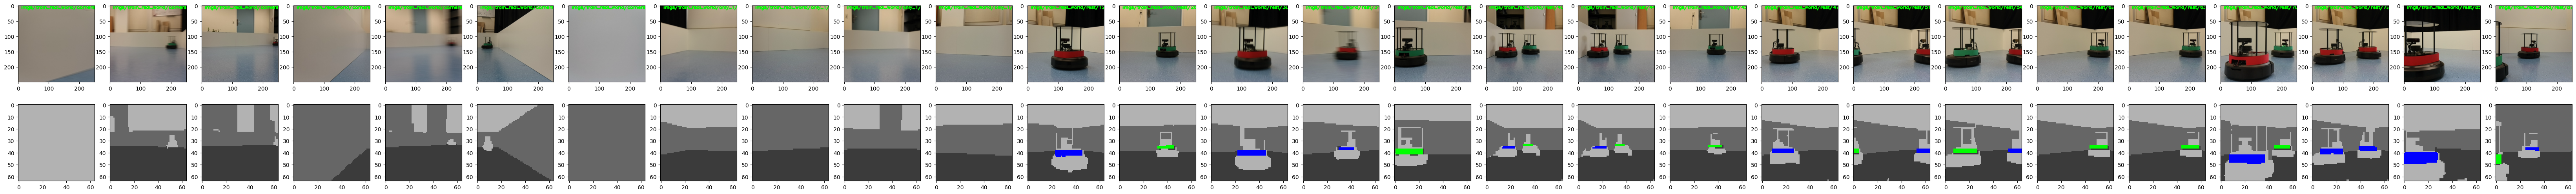

In [3]:
size = len(selected_segments)


plt.figure(figsize=(size*3,2*3))
for i in range(size):
    plt.subplot(2, size, i+1)
    img = selected_not_segemnted[i][1]
    img = cv2.putText(img, str(selected_not_segemnted[i][0]), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    plt.imshow(img)
    plt.subplot(2, size, size+i+1)
    
    plt.imshow(selected_segments[i][1])
    



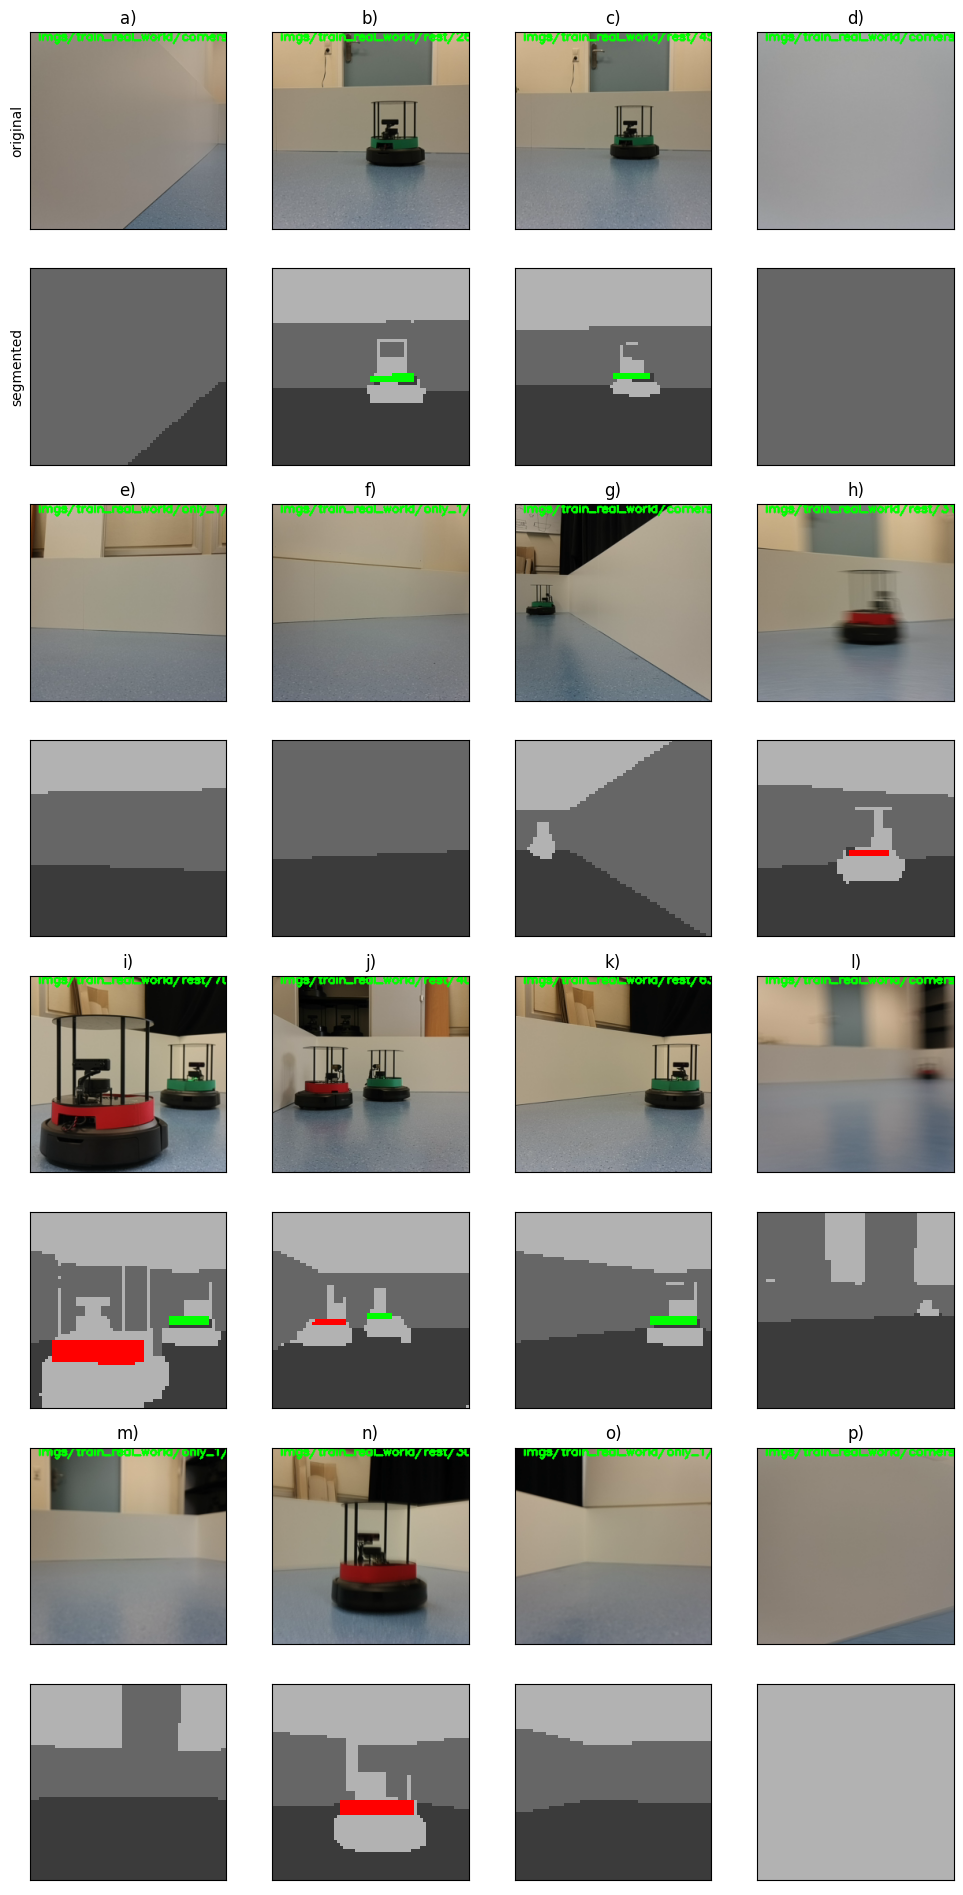

In [4]:
from random import shuffle

selected_segments 
selected_not_segemnted 


sub_selected = [0,3,4,5,6,7,8,9,10,12,13,14,16,18,23,24]
shuffle(sub_selected)

size = len(sub_selected)

squre = 4

ylabel = ['original','segmented']
xlabel = 'abcdefghijklmnopqrstuvxyz'

plt.figure(figsize=(squre*3,squre*3*2))

# 4 by 4 * 2 matrix of images
for i in range(size):
    idx = sub_selected[i]

    xpos = i // squre
    ypos = i % squre


    
    plt.subplot(squre*2,squre,xpos * squre * 2 + ypos + squre + 1)
    img = cv2.cvtColor(selected_segments[idx][1],cv2.COLOR_RGB2BGR)
    plt.imshow(img)

    if i == 0:
        plt.ylabel(ylabel[1])

    plt.xticks([])
    plt.yticks([])

    

    plt.subplot(squre*2,squre,xpos * squre * 2 + ypos + 1)
    img = selected_not_segemnted[idx][1]
    plt.imshow(img)

    plt.title(xlabel[i] + ')')

    if i == 0:
        plt.ylabel(ylabel[0])
    # hide axis
    plt.xticks([])
    plt.yticks([])



In [6]:
def plot_img_segs(imgs):
    size = len(imgs)

    for i in range(size):
        plt.subplot(2, size, i+1)
        plt.imshow(imgs[i])
        plt.axis('off')
        plt.subplot(2, size, i+size+1)
        seg = seg.segment3(imgs[i])
        seg = (seg[0] @ fake_features).astype(np.uint8)

        plt.imshow(seg)

        plt.axis('off')
    
    plt.show()

plot_img_segs(imgs)

NameError: name 'imgs' is not defined